In [6]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import math

import matplotlib.pyplot as plt 
%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2016")

if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")


import os
import json
# s = json.load( open(os.getenv('PUI2018') + "/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


In [7]:
# os.environ['PUI2018']="/Users/yanghaoming/Desktop/Data_science/PUI2018"
# os.environ['PUIDATA']="/Users/yanghaoming/Desktop/Data_science/PUI2018/PUIDATA"
# os.environ

environ({'SHELL': '/bin/zsh', 'TMPDIR': '/var/folders/2w/52wsw6cx0l5_d4yqld7z18gw0000gn/T/', 'CONDA_SHLVL': '1', 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.0yublJrDn6/Render', 'CONDA_PROMPT_MODIFIER': '(base) ', 'LC_ALL': 'en_US.UTF-8', 'USER': 'yanghaoming', 'CONDA_EXE': '/anaconda3/bin/conda', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.wWkywFJWHU/Listeners', '__CF_USER_TEXT_ENCODING': '0x1F5:0x19:0x34', 'CONDA_ROOT': '/anaconda3', 'PATH': '/anaconda3/bin:/anaconda3/bin:/usr/bin:/bin:/usr/sbin:/sbin', 'CONDA_PREFIX': '/anaconda3', 'PWD': '/Users/yanghaoming', 'LANG': 'en_US.UTF-8', 'XPC_FLAGS': '0x0', 'XPC_SERVICE_NAME': '0', 'SHLVL': '3', 'HOME': '/Users/yanghaoming', 'CONDA_PYTHON_EXE': '/anaconda3/bin/python', 'LOGNAME': 'yanghaoming', 'CONDA_DEFAULT_ENV': 'base', '_': '/anaconda3/python.app/Contents/MacOS/python', 'JPY_PARENT_PID': '61775', 'TERM': 'xterm-color', 'CLICOLOR': '1', 'PAGER': 'cat', 'GIT_PAGER': 'cat', 'MPLBACKEND': 'module://ipykernel.pylab.b

In [36]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system
### this code cell does a lot of things: looks for existing files, download a file if none is there, unzips it, moves it.
### you do not have to have a code cell this complicated. 
### As long as 
### 1) your research is reproducible: we can access the same file as you without having to ask you for the file
### 2) and your data is stored in a directory pointed to by the env variable PUIDATA 
### you will be fine. We already explored how to download data in other notebooks!

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.csv.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [37]:
datestring="201808"
getCitiBikeCSV(datestring)

file in place, you can continue


In [38]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01 00:00:07.321
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01 00:00:19.748
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01 00:00:21.175
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01 00:00:26.470
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01 00:00:30.291


In [39]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

## The hypothesis question: Whether the tripduration time varies between weekdays and weekend? Will people ride longer in weekends? 

### Null hypothesis: T(weekdays)- T(weekend)>=0
### Alternativae hypothesis:  T(weekdays)- T(weekdend)<0
T stands for tripduration
### I will use the significant level a=0.05

In [40]:
df_new=df[['tripduration','gender','date']]

In [41]:
df_new.head()

,tripduration,gender,date
0,681,1,2018-08-01 00:00:07.321
1,625,1,2018-08-01 00:00:19.748
2,1319,1,2018-08-01 00:00:21.175
3,220,1,2018-08-01 00:00:26.470
4,398,1,2018-08-01 00:00:30.291


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


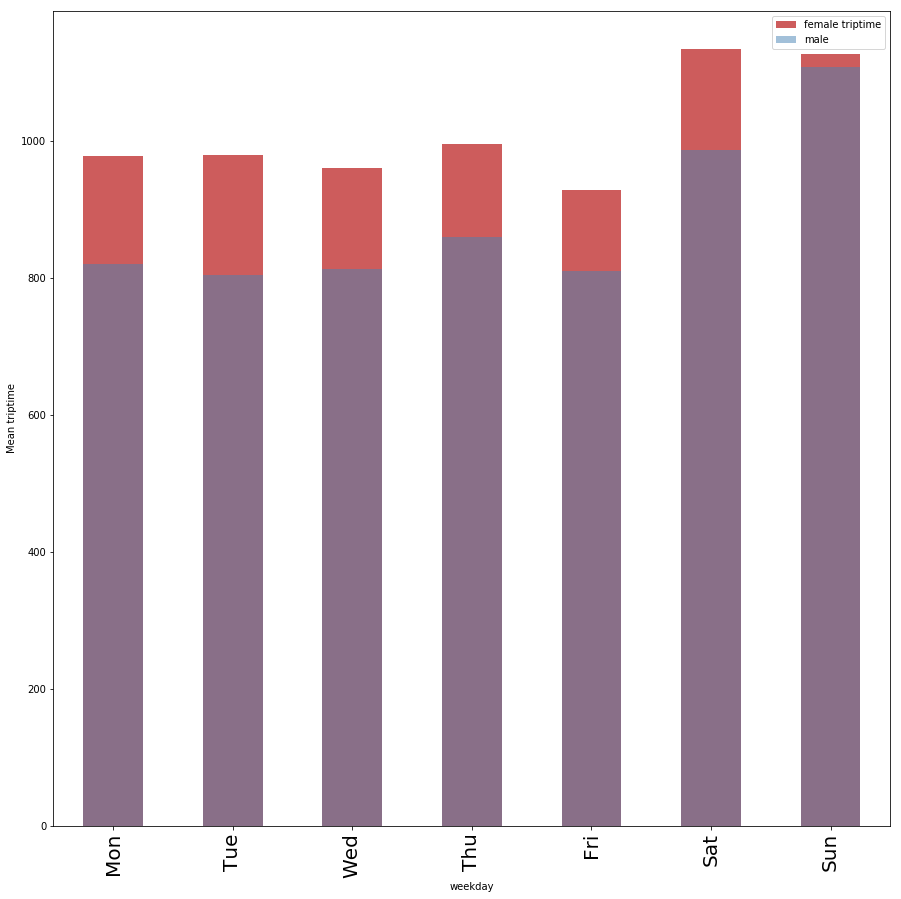

In [42]:
fig = pl.figure(figsize(15,15))
df_new['weekday']=df_new['date'].dt.weekday
norm_w = 1
ind_m=df_new.gender==1
ind_f=df_new.gender==2
df_m=df_new.loc[ind_m]
df_f=df_new.loc[ind_f]

ax=     (df_f['tripduration'].groupby(df_new['weekday']).mean()/ norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female triptime')

norm_m = 1
ax =    (df_m['tripduration'].groupby(df_new['weekday']).mean()/ norm_w).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')
ax.set_ylabel('Mean triptime') 
tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

## Figure 1.1 : The distribution of mean tripduration on each days shows that people tends to ride more on weekend

In [43]:
df_m.groupby(df_new['weekday']).mean()

,tripduration,gender,weekday
weekday,,,
0,821.255593,1.0,0.0
1,805.153130,1.0,1.0
2,813.058173,1.0,2.0
3,860.033344,1.0,3.0
4,810.200395,1.0,4.0
5,987.919503,1.0,5.0
6,1108.522944,1.0,6.0


In [44]:
df_f.groupby(df_new['weekday']).mean()

week_total=df_new.weekday<5
weekend_total=df_new.weekday>=5
df_new_weektotal=df_new[week_total]
df_new_weekendtotal=df_new[weekend_total]
mean_week_total=df_new_weektotal['tripduration'].mean()
std_week_total=df_new_weektotal['tripduration'].std()
mean_weekend_total=df_new_weekendtotal['tripduration'].mean()
std_weekend_total=df_new_weekendtotal['tripduration'].std()
n_total_week=len(df_new_weektotal)
n_total_weekend=len(df_new_weekendtotal)

Week_f=df_f.weekday<5
Weekend_f=df_f.weekday>=5
df_f_week=df_f[Week_f]
df_f_weekend=df_f[Weekend_f]
mean_week_f=df_f_week['tripduration'].mean()
std_week_f=df_f_week['tripduration'].std()
mean_weekend_f=df_f_weekend['tripduration'].mean()
std_weekend_f=df_f_weekend['tripduration'].std()
n_f_week=len(df_f_week.index)
n_f_weekend=len(df_f_weekend.index)

Week_m=df_m.weekday<5
Weekend_m=df_m.weekday>=5
df_m_week=df_m[Week_m]
df_m_weekend=df_m[Weekend_m]
mean_week_m=df_m_week['tripduration'].mean()
std_week_m=df_m_week['tripduration'].std()
mean_weekend_m=df_m_weekend['tripduration'].mean()
std_weekend_m=df_m_weekend['tripduration'].std()
n_m_week=len(df_m_week.index)
n_m_weekend=len(df_m_weekend.index)


print('female weekday sample size %s'%n_f_week)
print('male weekday sample size %s'%n_m_week)
print ('total weekday sample size %s'%n_total_week)

print('female weekend sample size %s'%n_f_weekend)
print('male weekend sample size %s'%n_m_weekend)
print('total weekend sample size %s'%n_total_weekend)

print('total weekday mean tripduration %s'%mean_week_total)
print('total weekend mean tripduration %s'%mean_weekend_total)
print('total weekday std tripduration %s'%std_week_total)
print('total weekend std tripduration %s'%std_weekend_total)





print('female weekday mean tripduration  %s '%mean_week_f)
print('female weekday std tripduration  %s'%std_week_f)
print('female weekend mean tripduration  %s'%mean_weekend_f)
print('female weekend std tripduration  %s'%std_weekend_f)

print('male weekday mean tripduration  %s'%mean_week_m)
print('male weekday std tripduration  %s'%std_week_m)
print('male weekend mean tripduration  %s'%mean_weekend_m)
print('male weekend std tripduration  %s'%mean_weekend_m)

female weekday sample size 366635
male weekday sample size 1047060
total weekday sample size 1542368
female weekend sample size 108850
male weekend sample size 249252
total weekend sample size 434809
total weekday mean tripduration 950.9918625127077
total weekend mean tripduration 1228.4160102481778
total weekday std tripduration 9917.837356413838
total weekend std tripduration 15263.004872777665
female weekday mean tripduration  968.3268673203595 
female weekday std tripduration  9342.233729973295
female weekend mean tripduration  1131.0045567294442
female weekend std tripduration  10151.222897360018
male weekday mean tripduration  823.1827784463163
male weekday std tripduration  8028.49852103291
male weekend mean tripduration  1050.4997271837337
male weekend std tripduration  1050.4997271837337


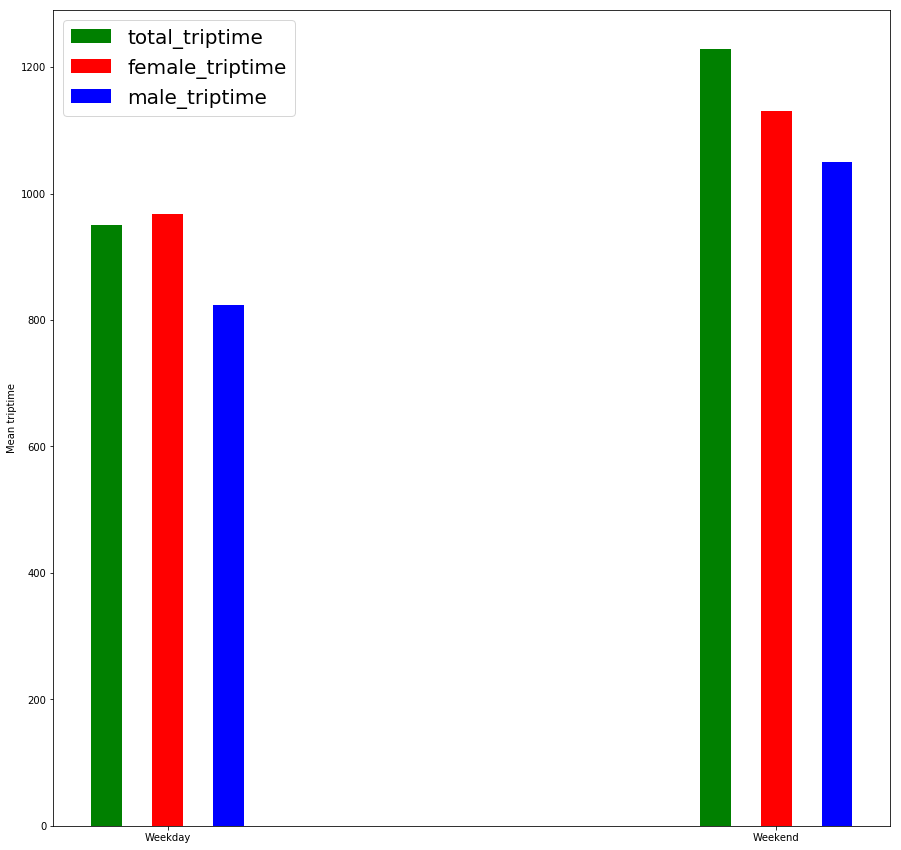

In [45]:
# y=[mean_week_total, mean_week_f, mean_week_m]
# x=[0,1]
# # ax= pl([0.6],mean_week_total,kind="bar", color='IndianRed', label='female triptime')
# plt.bar(x,y,0.4,color="green")

# plt.xlabel("Weekday")
# tmp = ax.xaxis.set_ticklabels(['Weekday', 'Weekend'], fontsize=20)

N = 2 
y1=[mean_week_total,mean_weekend_total]
y2=[mean_week_f,mean_weekend_f]
y3=[mean_week_m,mean_weekend_m]
xtra_space = 0.05 
ind = np.arange(N) # the x locations for the groups 
width = 0.05  # the width of the bars 

fig, ax = plt.subplots() 
rects1 = ax.bar(ind, y1, width, color='g') 
rects2 = ax.bar(ind+width+xtra_space, y2, width, color='r')
rects2 = ax.bar(ind+width*2+xtra_space*2, y3, width, color='b')

# add some text for labels, title and axes ticks 
ax.set_ylabel('Mean triptime') 
# ax.set_title('Population: Age Structure') 

ax.set_xticks(ind+width+xtra_space) 
ax.set_xticklabels(('Weekday', 'Weekend')) 
plt.legend(['total_triptime','female_triptime','male_triptime'],fontsize=20)
plt.show() 

## Figure 1.2 : On average, both females and males appear to ride longer on weekend and the total triptime shows that people ride longer on average

### In order to compare the weekdays mean tripduration and weekend trip duration in each groups, I conduct a t-test for I do not konw the true population variance.

In [46]:
#for total t-test
def get_t_statistics(size_week,size_weekend,mean_week, mean_weekend,std_week, std_weekend):
    n1=size_week
    n2=size_weekend
    m1=mean_week
    m2=mean_weekend
    s1=std_week
    s2=std_weekend
    sp2=((n1-1)*(s1**2)+(n2-1)*(s2**2))/(n1+n2-2)
    t=(m2-m1)/math.sqrt(sp2/n1+sp2/n2)
    degree_of_freedom=n1+n2-2
    return t, degree_of_freedom

In [47]:
t_total,d_total=get_t_statistics(n_total_week,n_total_weekend, mean_week_total, mean_weekend_total,std_week_total, std_weekend_total)
t_female,d_f=get_t_statistics(n_f_week,n_f_weekend, mean_week_f, mean_weekend_f,std_week_f, std_weekend_f)
t_male,d_m=get_t_statistics(n_m_week,n_m_weekend, mean_week_m, mean_weekend_m,std_week_m, std_weekend_m)
print('t statistics for total population: %s, degree of freedom: %s'%(t_total,d_total))
print('t statistics for female population: %s, degree of freedom: %s'%(t_female,d_f))
print('t statistics for male population: %s, degree of freedom: %s'%(t_male,d_m))


t statistics for total population: 14.28310382036698, degree of freedom: 1977175
t statistics for female population: 4.943548654181577, degree of freedom: 475483
t statistics for male population: 10.25635715073465, degree of freedom: 1296310


## when degree of fremdom larger than 1000, the 99.9% significant level t statistics <3.3. Therefore, all of the t test shows a rejection to the Null hypothesis. 

# Result
## The rejection of all t-test indicates that people, no matter male or female or as a whole, have significant longer riding on weekend than on weekdays. 

# Robustness test

### Use another period dataset to see whether the same conclusion could hold

In [48]:
datestring="201712"
getCitiBikeCSV(datestring)

file in place, you can continue


In [49]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# # note that with dataframes I can refer to variables as dictionary keys, 
# # i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,256,2017-12-01 00:00:00,2017-12-01 00:04:17,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,262,Washington Park,40.691782,-73.973730,18858,Subscriber,1981.0,1,2017-12-01 00:00:00
1,325,2017-12-01 00:00:17,2017-12-01 00:05:43,470,W 20 St & 8 Ave,40.743453,-74.000040,490,8 Ave & W 33 St,40.751551,-73.993934,19306,Subscriber,1992.0,1,2017-12-01 00:00:17
2,967,2017-12-01 00:00:19,2017-12-01 00:16:26,347,Greenwich St & W Houston St,40.728846,-74.008591,504,1 Ave & E 16 St,40.732219,-73.981656,28250,Subscriber,1992.0,1,2017-12-01 00:00:19
3,125,2017-12-01 00:00:20,2017-12-01 00:02:26,3077,Stagg St & Union Ave,40.708771,-73.950953,3454,Leonard St & Maujer St,40.710369,-73.947060,25834,Subscriber,1988.0,1,2017-12-01 00:00:20
4,451,2017-12-01 00:00:28,2017-12-01 00:08:00,368,Carmine St & 6 Ave,40.730386,-74.002150,326,E 11 St & 1 Ave,40.729538,-73.984267,14769,Subscriber,1986.0,1,2017-12-01 00:00:28


In [50]:
df_new=df[['tripduration','gender','date']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


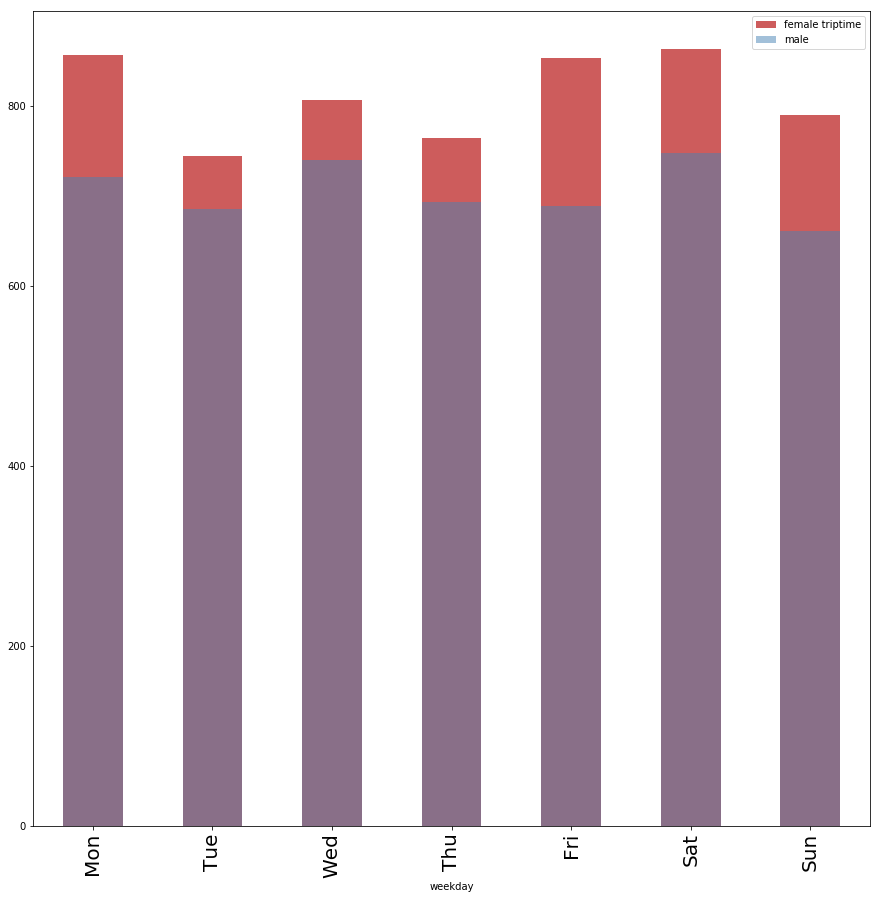

In [51]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
df_new['weekday']=df_new['date'].dt.weekday
norm_w = 1
ind_m=df_new.gender==1
ind_f=df_new.gender==2
df_m=df_new.loc[ind_m]
df_f=df_new.loc[ind_f]

ax=     (df_f['tripduration'].groupby(df_new['weekday']).mean()/ norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female triptime')

norm_m = 1
ax =    (df_m['tripduration'].groupby(df_new['weekday']).mean()/ norm_w).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

## Figure 2.1 : The distribution of mean tripduration on each days shows that people spend nearly equal amount of time in riding on each time

In [52]:
df_f.groupby(df_new['weekday']).mean()

week_total=df_new.weekday<5
weekend_total=df_new.weekday>=5
df_new_weektotal=df_new[week_total]
df_new_weekendtotal=df_new[weekend_total]
mean_week_total=df_new_weektotal['tripduration'].mean()
std_week_total=df_new_weektotal['tripduration'].std()
mean_weekend_total=df_new_weekendtotal['tripduration'].mean()
std_weekend_total=df_new_weekendtotal['tripduration'].std()
n_total_week=len(df_new_weektotal)
n_total_weekend=len(df_new_weekendtotal)

Week_f=df_f.weekday<5
Weekend_f=df_f.weekday>=5
df_f_week=df_f[Week_f]
df_f_weekend=df_f[Weekend_f]
mean_week_f=df_f_week['tripduration'].mean()
std_week_f=df_f_week['tripduration'].std()
mean_weekend_f=df_f_weekend['tripduration'].mean()
std_weekend_f=df_f_weekend['tripduration'].std()
n_f_week=len(df_f_week.index)
n_f_weekend=len(df_f_weekend.index)

Week_m=df_m.weekday<5
Weekend_m=df_m.weekday>=5
df_m_week=df_m[Week_m]
df_m_weekend=df_m[Weekend_m]
mean_week_m=df_m_week['tripduration'].mean()
std_week_m=df_m_week['tripduration'].std()
mean_weekend_m=df_m_weekend['tripduration'].mean()
std_weekend_m=df_m_weekend['tripduration'].std()
n_m_week=len(df_m_week.index)
n_m_weekend=len(df_m_weekend.index)


print('female weekday sample size %s'%n_f_week)
print('male weekday sample size %s'%n_m_week)
print ('total weekday sample size %s'%n_total_week)

print('female weekend sample size %s'%n_f_weekend)
print('male weekend sample size %s'%n_m_weekend)
print('total weekend sample size %s'%n_total_weekend)

print('total weekday mean tripduration %s'%mean_week_total)
print('total weekend mean tripduration %s'%mean_weekend_total)
print('total weekday std tripduration %s'%std_week_total)
print('total weekend std tripduration %s'%std_weekend_total)





print('female weekday mean tripduration  %s '%mean_week_f)
print('female weekday std tripduration  %s'%std_week_f)
print('female weekend mean tripduration  %s'%mean_weekend_f)
print('female weekend std tripduration  %s'%std_weekend_f)

print('male weekday mean tripduration  %s'%mean_week_m)
print('male weekday std tripduration  %s'%std_week_m)
print('male weekend mean tripduration  %s'%mean_weekend_m)
print('male weekend std tripduration  %s'%mean_weekend_m)

female weekday sample size 152377
male weekday sample size 527075
total weekday sample size 709885
female weekend sample size 42425
male weekend sample size 124473
total weekend sample size 180082
total weekday mean tripduration 754.0326292286779
total weekend mean tripduration 808.2194555813463
total weekday std tripduration 7982.841122395618
total weekend std tripduration 9286.296912890399
female weekday mean tripduration  806.5632936729296 
female weekday std tripduration  8577.607312858448
female weekend mean tripduration  822.7112315851502
female weekend std tripduration  7221.872807712371
male weekday mean tripduration  704.7402817435849
male weekday std tripduration  7844.917001612964
male weekend mean tripduration  701.6468953106296
male weekend std tripduration  701.6468953106296


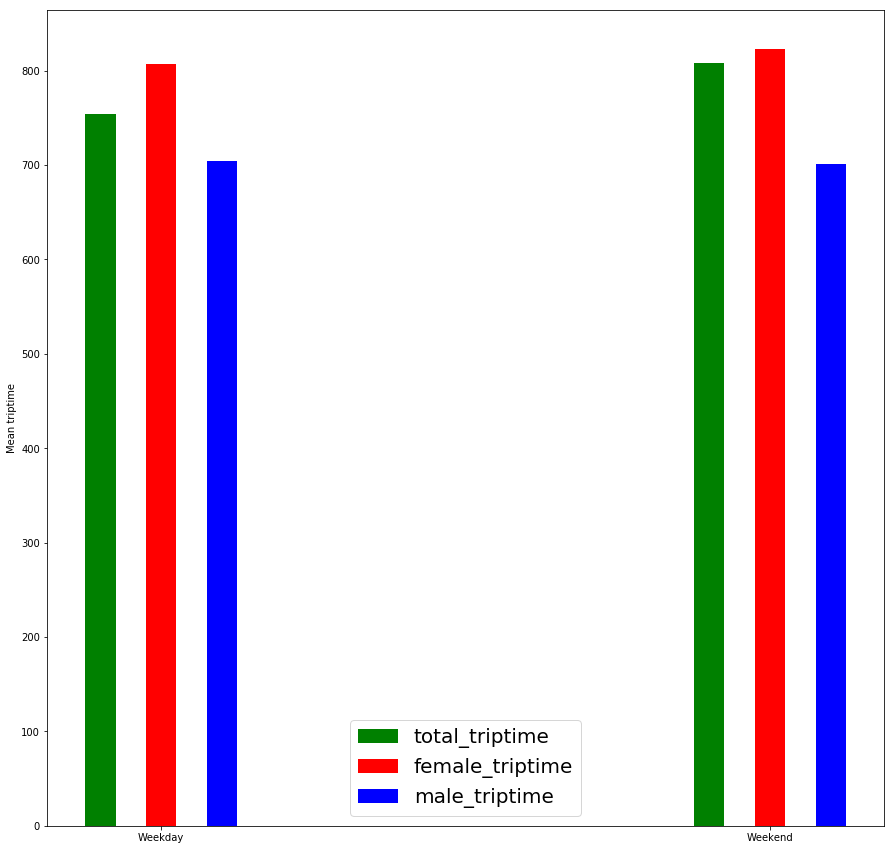

In [53]:
N = 2 
y1=[mean_week_total,mean_weekend_total]
y2=[mean_week_f,mean_weekend_f]
y3=[mean_week_m,mean_weekend_m]
xtra_space = 0.05 
ind = np.arange(N) # the x locations for the groups 
width = 0.05  # the width of the bars 

fig, ax = plt.subplots() 
rects1 = ax.bar(ind, y1, width, color='g') 
rects2 = ax.bar(ind+width+xtra_space, y2, width, color='r')
rects2 = ax.bar(ind+width*2+xtra_space*2, y3, width, color='b')

# add some text for labels, title and axes ticks 
ax.set_ylabel('Mean triptime') 
# ax.set_title('Population: Age Structure') 

ax.set_xticks(ind+width+xtra_space) 
ax.set_xticklabels(('Weekday', 'Weekend')) 
plt.legend(['total_triptime','female_triptime','male_triptime'],fontsize=20)
plt.show() 

## Figure 1.2 : On average,  females and total as a whole appear to ride longer on weekend, but males do not rider longer on weekend

In [54]:
t_total,d_total=get_t_statistics(n_total_week,n_total_weekend, mean_week_total, mean_weekend_total,std_week_total, std_weekend_total)
t_female,d_f=get_t_statistics(n_f_week,n_f_weekend, mean_week_f, mean_weekend_f,std_week_f, std_weekend_f)
t_male,d_m=get_t_statistics(n_m_week,n_m_weekend, mean_week_m, mean_weekend_m,std_week_m, std_weekend_m)
print('t statistics for total population: %s, degree of freedom: %s'%(t_total,d_total))
print('t statistics for female population: %s, degree of freedom: %s'%(t_female,d_f))
print('t statistics for male population: %s, degree of freedom: %s'%(t_male,d_m))


t statistics for total population: 2.485350530476764, degree of freedom: 889965
t statistics for female population: 0.3543630169336819, degree of freedom: 194800
t statistics for male population: -0.11965952241600453, degree of freedom: 651546


## when degree of fremdom is close to infinity, the 95% significant level t statistics is close 1.645. Therefore, only the t test for total population shows a rejection to the Null hypothesis. Female and male population does not reject the null hypothesis

# Result
## The rejection of all t-test indicates that although the total population have significant longer riding on weekend than on weekdays. However, the failness to reject the null hypothesis of female and male population indicates that the data has somewhat limitation for not including comprehensive information on gender data. The Robutness test shows that the orignial hypothesis is not likely to be true across time.